# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Введение

Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.
### Материалы

    Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
    Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел

## Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1.
6. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1.
7. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [108]:
import numpy as np
import scipy


f_bounds = (1, 30)

def f(x: float) -> float:
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
    

Проверим, как меняется значение функции в зависимости от начального приближения

In [109]:
start_values = [1, 1.1, 1.2, 1.5, 2, 3.5, 5, 15, 20, 25, 30]

for start_value in start_values:
    opt_res = scipy.optimize.minimize(lambda arr: f(arr[0]), start_value, bounds=(f_bounds, ))
    opt_x = opt_res.x.item()
    opt_f = opt_res.fun
    print(f"start:{start_value}, argmin:{opt_x}, min f:{opt_f}")
    

start:1, argmin:4.136288463186312, min f:1.745268290331977
start:1.1, argmin:4.136288307650032, min f:1.7452682903319854
start:1.2, argmin:4.136288219386162, min f:1.7452682903319916
start:1.5, argmin:4.1362887833649875, min f:1.7452682903319734
start:2, argmin:4.1362760396269405, min f:1.7452682903452363
start:3.5, argmin:4.13628804725182, min f:1.7452682903320076
start:5, argmin:4.13628873017476, min f:1.7452682903319725
start:15, argmin:25.880187401299192, min f:-11.898894665971893
start:20, argmin:25.880193031957244, min f:-11.898894665981322
start:25, argmin:25.88018631745339, min f:-11.898894665967914
start:30, argmin:25.880193089892767, min f:-11.898894665981322


In [110]:
# L-BFGS-B вместо обычного BFGS, чтобы учесть границы, тк обычный метод их не поддерживает
bfgs_opt = scipy.optimize.minimize(lambda arr: f(arr[0]), np.array([2]), method='L-BFGS-B', bounds=(f_bounds, ))
print(f"{bfgs_opt.x} : {bfgs_opt.fun}")


[4.13627604] : 1.7452682903452363


Ответ 1.1: 1.7452682903452363


In [111]:
# L-BFGS-B вместо обычного BFGS, чтобы учесть границы, тк обычный метод их не поддерживает
bfgs_opt = scipy.optimize.minimize(lambda arr: f(arr[0]), np.array([30]), method='L-BFGS-B', bounds=(f_bounds, ))
print(f"{bfgs_opt.x} : {bfgs_opt.fun}")


[25.88019309] : -11.898894665981322


Ответ 1.2: -11.898894665981322 
Если посмотреть на график функции на [1, 30] и расположить на нем начальные точки, то можно заметить,
что минимум функции выбирается ближайший к начальной точке


## Задача 2: Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5.Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [112]:
evol_opt = scipy.optimize.differential_evolution(lambda arr: f(arr[0]), bounds=[f_bounds])
print(f"{evol_opt.x} : {evol_opt.fun}")
print(f"rounded: {np.round(evol_opt.fun, 2)}")


[25.88019656] : -11.898894665977611
rounded: -11.9


Ответ 2.1: -11.90


In [113]:
print(f"BFGS iteration: {bfgs_opt.nit}")
print(f"Dif. evolution: {evol_opt.nit}")


BFGS iteration: 5
Dif. evolution: 4


BFGS iteration: 5
Dif. evolution: 4 (5, 6)
Заметим, что кол-во итераций для метода диф. эволюции меняется от 4 до 6, в то время как BFGS стабильно считает за 5 шагов


## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Постройте график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [114]:
def h(x: float) -> int:
    return int(f(x))

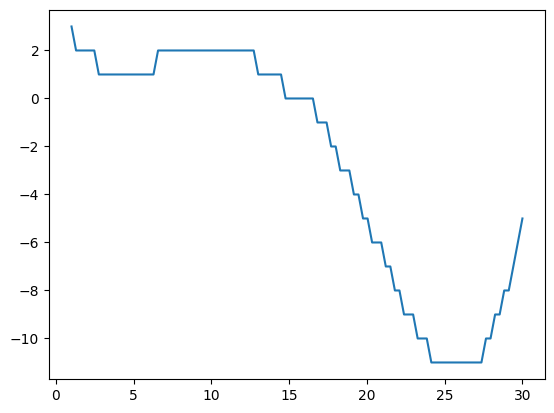

In [118]:
import matplotlib.pyplot as plt

x = np.linspace(f_bounds[0], f_bounds[1], 100)
h_vec = np.vectorize(h)
plt.plot(x, h_vec(x))
plt.show()


In [120]:
bfgs_h_opt = scipy.optimize.minimize(lambda arr: h(arr[0]), np.array([30]), method='L-BFGS-B', bounds=(f_bounds, ))
bfgs_h_opt.fun

-5

Ответ 3.1: -5

In [122]:
diff_h_opt = scipy.optimize.differential_evolution(lambda arr: h(arr[0]), bounds=[f_bounds])
diff_h_opt.fun

np.float64(-11.0)

Ответ 3.2: -11


Полученные ответы объясняются тем, что, тк BFGS использует производную функции, а производная ступенчатой функции представляет и себя график y=0 с точками разрыва в точках, где функция меняет своё значение, а следовательно, с начального приближения метод оптимизации и не сдвинется
